In [2]:
from IPython.display import display, Image

# !pip install ultralytics
display.clear_output()

AttributeError: 'function' object has no attribute 'clear_output'

In [3]:
torch.cuda.is_available()

True

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch 
from ultralytics import YOLO

from shapely.geometry import Polygon
import cv2

import os
import locale
print(locale.getpreferredencoding())

# from google.colab import drive
# drive.mount('/content/drive')


utf-8


In [4]:
def getpreferredencoding(do_setlocale = True):
    """
    Для корректного чтения файлов .npy
    """
    return "UTF-8"

locale.getpreferredencoding = getpreferredencoding
print(locale.getpreferredencoding())

UTF-8


In [4]:
!unzip '/content/drive/MyDrive/YOLO_dataset.zip' -d '/content'
display.clear_output()

Archive:  /content/drive/MyDrive/YOLO_dataset.zip
replace /content/YOLO_dataset/data.yaml? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace /content/YOLO_dataset/data.yaml? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: /content/YOLO_dataset/data.yaml  
  inflating: /content/YOLO_dataset/train/images/rs00000.jpg  
  inflating: /content/YOLO_dataset/train/images/rs00001.jpg  
  inflating: /content/YOLO_dataset/train/images/rs00002.jpg  
  inflating: /content/YOLO_dataset/train/images/rs00003.jpg  
  inflating: /content/YOLO_dataset/train/images/rs00004.jpg  
  inflating: /content/YOLO_dataset/train/images/rs00005.jpg  
  inflating: /content/YOLO_dataset/train/images/rs00006.jpg  
  inflating: /content/YOLO_dataset/train/images/rs00007.jpg  
  inflating: /content/YOLO_dataset/train/images/rs00008.jpg  
  inflating: /content/YOLO_dataset/train/images/rs00009.jpg  
  inflating: /content/YOLO_dataset/train/images/rs00011.jpg  
  inflating: /content/YOLO_dat

In [ ]:
model = YOLO('yolov8n-seg.pt')
# model.info()

results = model.train(data=r'C:\Users\ivano\OneDrive\Документы\GitHub\Rail_segm\gen_dataset\YOLO_dataset\data.yaml', epochs=1, imgsz=640, hide_labels=True, workers=2, batch=128, device='cuda')

#inference
# results = model('results/bus.jpg')

WARNING ⚠️ 'hide_labels' is deprecated and will be removed in 'ultralytics 8.299999999999999' in the future. Please use 'show_labels' instead.
Ultralytics YOLOv8.1.15 🚀 Python-3.11.5 torch-2.1.2+cu121 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
engine\trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=C:\Users\ivano\OneDrive\Документы\GitHub\Rail_segm\gen_dataset\YOLO_dataset\data.yaml, epochs=1, time=None, patience=50, batch=128, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=0, project=None, name=train19, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=Fal

train: Scanning C:\Users\ivano\OneDrive\Документы\GitHub\Rail_segm\gen_dataset\YOLO_dataset\train\labels.cache... 208 images, 66 backgrounds, 0 corrupt: 100%|██████████| 208/208 [00:00<?, ?it/s]
val: Scanning C:\Users\ivano\OneDrive\Документы\GitHub\Rail_segm\gen_dataset\YOLO_dataset\validation\labels.cache... 90 images, 31 backgrounds, 0 corrupt: 100%|██████████| 90/90 [00:00<?, ?it/s]


Plotting labels to runs\segment\train19\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.001), 76 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\segment\train19
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/2 [00:00<?, ?it/s]

: 

In [48]:
metrics = model.val()

Ultralytics YOLOv8.1.14 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3258259 parameters, 0 gradients, 12.0 GFLOPs


val: Scanning /content/YOLO_dataset/validation/labels.cache... 90 images, 31 backgrounds, 0 corrupt: 100%|██████████| 90/90 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.12s/it]


                   all         90        172      0.726      0.401      0.478      0.229      0.616      0.337      0.335      0.113
Speed: 2.0ms preprocess, 11.1ms inference, 0.0ms loss, 7.5ms postprocess per image
Results saved to runs/segment/train62


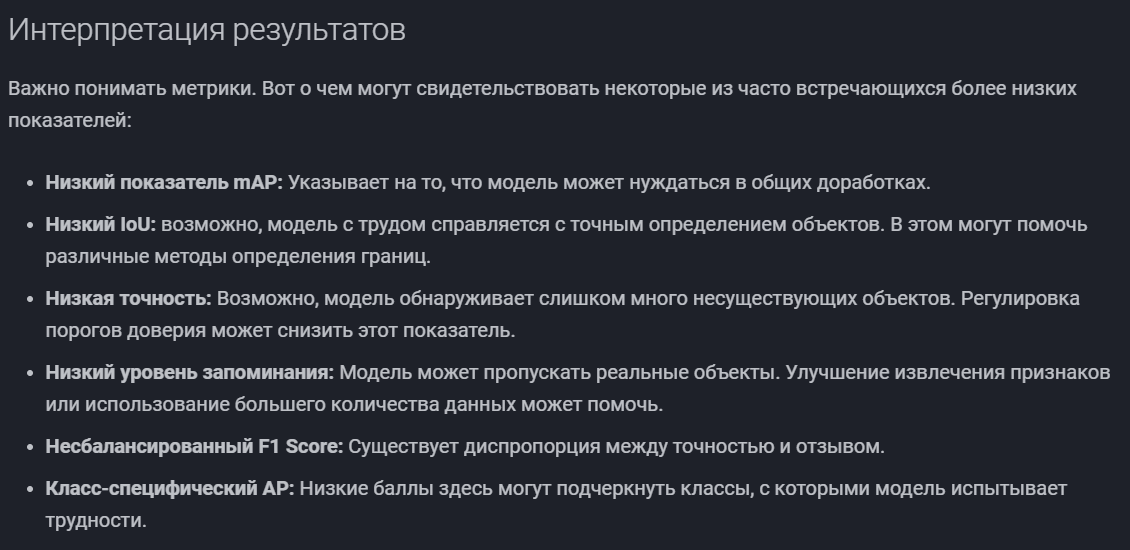

### В данном случае нас интересуют: `IoU`, `mAP50`, `loss`, 

Дальше, когда будут доабвляться классы, будет важен `класс-специфичный AP`, т.е. метрика AP для каждого класса

In [49]:
# metrics.box.map    # map50-95(B)
# metrics.box.map50  # map50(B)
# metrics.box.map75  # map75(B)
# metrics.box.maps   # a list contains map50-95(B) of each category
metrics.seg.map    # map50-95(M)
metrics.seg.map50  # map50(M)
# metrics.seg.map75  # map75(M)
# metrics.seg.maps   # a list contains map50-95(M) of each category

0.3354500187243643

In [50]:
pred = model.predict('/content/YOLO_dataset/train/images/rs00578.jpg', iou=0.5, save=True, imgsz=640, conf=0.5)


image 1/1 /content/YOLO_dataset/train/images/rs00578.jpg: 384x640 1 switch, 16.4ms
Speed: 2.1ms preprocess, 16.4ms inference, 14.2ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/segment/train63


## Расчет метрики IoU
### Я не нашел в документации того, как считать метрику, поэтому будем считать ее вручную

In [5]:
pred

NameError: name 'pred' is not defined

In [97]:
## сохранение в виде uint64
def generate_uint8_format(image_path, model, output_file='merged_segs.jpg'):
        """
        Генерируем картинки с предсказанными масками в формате uint8 -> JPG

        input -> one_img_path, model, name_to_out 
        output -> mask.jpg = uint8
        """
        masks_pred, boxes = extract_pred_masks(image_path, model)

        #extract classes
        clss = boxes[:, 5]
        # get indices of results where class is 0 (people in COCO)
        people_indices = torch.where(clss == 0)
        # use these indices to extract the relevant masks
        people_masks = masks_pred[people_indices]
        # scale for visualizing results
        people_mask = torch.any(people_masks, dim=0).int() * 255
        # save to file
        cv2.imwrite(str(model.predictor.save_dir / output_file), people_mask.cpu().numpy())

        print('Succesfully saved to:', str(model.predictor.save_dir / 'merged_segs.jpg'))


def extract_pred_masks(image_path, model):
    """
    Сохраняем в переменные наши маски и боксы - результаты инференса модели
    для дальнейшего расчет метрики IoU и сохранения масок в формате uint8

    input -> one_img_path
    output -> masks_numpy, boxes_numpy
    """
    img = cv2.imread(image_path)
    results = model.predict(source=img.copy(), save=True, save_txt=False, stream=True)
    for result in results:
        # get array results
        masks_pred = result.masks.data
        boxes = result.boxes.data

    print('Shape of masks:', masks_pred.shape)
    return masks_pred, boxes


torch.Size([384, 640])
0: 384x640 1 switch, 53.5ms
Speed: 3.7ms preprocess, 53.5ms inference, 10.0ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/segment/train613


In [ ]:
image_path = '/content/YOLO_dataset/train/images/rs00578.jpg'

mask_pred, _ = extract_pred_masks(image_path)

In [98]:
def yolomask_to_numpy(file_path):
    """
    Чтение и трансформация маски yolo в массив numpy

    input -> one-annotation-file
    output -> return masks_true_numpy without one dimension
    """
    with open() as file:
      data = file.read()

    arr_data_str = data.split('\n')
    masks_true = np.array([np.array(item.split(' ')).astype(float) for item in arr_data_str[:-1]])

    print(masks_true.shape)

(4, 9)

In [ ]:
file_path = '/content/YOLO_dataset/train/labels/rs00578.txt'

yolomask_to_numpy(file_path)

In [37]:
def mask_to_rle(mask, threshold=0.5):
  """Преобразует маску YOLO в формат RLE.

  Args:
    mask: Маска YOLO в виде двумерного массива.
    threshold: Порог для определения пикселей объекта (по умолчанию 0,5).

  Returns:
    Список пар RLE.
  """

  # Растеризация маски
  mask = (mask > threshold).astype(int)
  # print(mask)

  # Инициализация списка RLE
  rle = []

  # Просмотр строк
  for row in mask:
    # Подсчет последовательных пикселей объекта
    count = 0
    for pixel in row:
      if pixel == 1:
        count += 1
      else:
        if count > 0:
          rle.append((1, count))
        count = 0

    # Добавление последней последовательности пикселей объекта
    if count > 0:
      rle.append((1, count))

  return rle


# Загрузка маски YOLO
mask = np.array([np.array([1, 2, 1, 2, 1, 3, 100]), np.array([1, 2, 3, 4, 1, 2, 3])])#np.load("mask.npy", allow_pickle=True)

# Преобразование маски в формат RLE
rle = mask_to_rle(mask)

# Вывод RLE-представления маски
print(rle)

[(1, 7), (1, 7)]


In [105]:
def iou(mask1, mask2, treshold=0.5):
    """
    Функция для расчёта метрики IOU между двумя полигонами.

    Аргументы:
    - box1: список вершин первого полигона [[x1, y1], [x2, y2], [x3, y3], [x4, y4]]
    - box2: список вершин второго полигона [[x1, y1], [x2, y2], [x3, y3], [x4, y4]]

    Возвращает:
    - iou: значение метрики IOU между полигонами
    """


    # Получение координат вершин полигонов
    rle1 = Polygon(mask_to_rle(mask1, treshold))
    rle2 = Polygon(mask_to_rle(mask2, treshold))
    print(rle1)

    # Расчёт пересечения и объединения полигонов
    intersection = rle1.intersection(rle2).area
    union = rle1.union(rle2).area

    # Расчёт IOU
    iou = intersection / (union + 0.00000001)  #убрать + 1

    return iou

def evaluate_model(predictions, ground_truths, iou_threshold=0.5):
    """
    Функция для оценки модели на метрике IOU для полигонов.

    Аргументы:
    - predictions: список предсказанных полигонов [[x1, y1], [x2, y2], [x3, y3], [x4, y4]]
    - ground_truths: список истинных полигонов [[x1, y1], [x2, y2], [x3, y3], [x4, y4]]
    - iou_threshold: пороговое значение IOU, по умолчанию 0.5

    Возвращает:
    - precision: точность модели
    """
    # Создание массива с метками инициализированными нулями
    true_positives = np.zeros(len(predictions))
    false_positives = np.zeros(len(predictions))
    ground_truth_matched = set()

    for i, prediction in enumerate(predictions):
        for j, ground_truth in enumerate(ground_truths):
            # Если метка уже сопоставлена с другим предсказанием, перейти к следующему истинному полигону
            if j in ground_truth_matched:
                continue
            # Проверить совпадение метки с предсказанием по пороговому значению IOU
            iou_score = iou(prediction, ground_truth)
            if iou_score >= iou_threshold:
                true_positives[i] = 1
                ground_truth_matched.add(j)
                break

        # Если полигон не имеет сопоставленных истинных полигонов, считать его ложным срабатыванием
        if true_positives[i] == 0:
            false_positives[i] = 1

    # Расчёт точности модели
    precision = np.sum(true_positives) / (np.sum(true_positives) + np.sum(false_positives))

    return precision

# predictions = [[[50, 70], [150, 70], [150, 170], [50, 170]],
#                [[250, 100], [350, 100], [350, 200], [250, 200]],
#                [[100, 150], [200, 150], [200, 250], [100, 250]]]
# ground_truths = [[[50, 70], [150, 70], [150, 170], [50, 170]],
#                  [[200, 200], [300, 200], [300, 300], [200, 300]],
#                  [[100, 150], [200, 150], [200, 250], [100, 250]]]

predictions = masks_pred.cpu().numpy()
ground_truths = [masks_true]    #т.к. 1 жлемент нужно добавить 1 размерность до формата tensor

precision = evaluate_model(predictions, ground_truths)
print("Precision:", precision)

POLYGON ((1 8, 1 6, 1 12, 1 20, 1 22, 1 22, 1 23, 1 23, 1 23, 1 23, 1 24, 1 24, 1 26, 1 27, 1 27, 1 27, 1 27, 1 28, 1 28, 1 28, 1 28, 1 29, 1 28, 1 29, 1 30, 1 30, 1 31, 1 31, 1 31, 1 31, 1 31, 1 32, 1 33, 1 33, 1 33, 1 34, 1 34, 1 35, 1 35, 1 37, 1 38, 1 38, 1 39, 1 39, 1 40, 1 40, 1 41, 1 41, 1 42, 1 42, 1 43, 1 42, 1 43, 1 43, 1 43, 1 44, 1 45, 1 46, 1 46, 1 47, 1 47, 1 48, 1 48, 1 48, 1 50, 1 50, 1 49, 1 50, 1 50, 1 51, 1 51, 1 52, 1 53, 1 53, 1 53, 1 54, 1 55, 1 56, 1 56, 1 57, 1 57, 1 58, 1 58, 1 59, 1 60, 1 61, 1 61, 1 61, 1 62, 1 62, 1 63, 1 64, 1 65, 1 65, 1 65, 1 66, 1 66, 1 68, 1 69, 1 69, 1 69, 1 69, 1 70, 1 71, 1 71, 1 72, 1 73, 1 73, 1 74, 1 74, 1 75, 1 76, 1 76, 1 77, 1 77, 1 78, 1 78, 1 79, 1 80, 1 80, 1 81, 1 81, 1 82, 1 82, 1 83, 1 84, 1 84, 1 85, 1 85, 1 86, 1 86, 1 87, 1 88, 1 88, 1 89, 1 89, 1 90, 1 90, 1 91, 1 92, 1 91, 1 92, 1 93, 1 93, 1 94, 1 95, 1 95, 1 96, 1 96, 1 97, 1 97, 1 98, 1 99, 1 99, 1 100, 1 100, 1 101, 1 101, 1 102, 1 103, 1 104, 1 104, 1 105, 1 105

## Якобы мы вытащили полигоны из аннотации и предикта, по функции iou и конвертации в RLE мы посчитали занчени IoU метрики, но точность = 0.0, будем разбираться дальше